In [1]:
%matplotlib inline

from pickle import load
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [2]:
data_file = '/home/sage/ml_playground/catsvsdogs/trained/keras/filenames_and_vectors.pkl'
base_path = '/home/sage/ml_playground/catsvsdogs/PetImages/tsne/'

In [3]:
with open(data_file, 'rb') as f:
    filenames_and_vectors = load(f)
        
data_vecs = filenames_and_vectors['data']
image_names = filenames_and_vectors['files']

perm = np.random.permutation(data_vecs.shape[0])
data_vecs = data_vecs[perm]
image_names = image_names[perm]

In [4]:
data_vecs.shape

(5000, 1024)

In [5]:
print('dimension reduction using svd')
print ('dimension before: {}'.format(str(data_vecs.shape[1])))
data_vecs = TruncatedSVD(n_components=50, random_state=0).fit_transform(data_vecs)
print ('dimension after: {}'.format(str(data_vecs.shape[1])))

dimension reduction using svd
dimension before: 1024
dimension after: 50


In [6]:
tsne_vecs = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(data_vecs)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.016s...
[t-SNE] Computed neighbors for 5000 samples in 3.824s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 14.354882
[t-SNE] Computed conditional probabilities in 0.502s
[t-SNE] Iteration 50: error = 84.5218582, gradient norm = 0.0062498 (50 iterations in 6.021s)
[t-SNE] Iteration 100: error = 82.0092163, gradient norm = 0.0083905 (50 iterations in 4.182s)
[t-SNE] Iteration 150: error = 81.8177719, gradient norm = 0.0017344 (50 iterations in 4.107s)
[t-SNE] Iteration 200: error = 81.8167496, gradient norm = 0.0000494 (50 iterations in 4.479s)
[t-SNE] Iteration 250: error = 81.8160782, gradient norm = 0.00003

In [9]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from imageio import imread
from skimage.transform import resize
from tqdm import tqdm

0it [00:00, ?it/s]/home/sage/envs/playground/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/sage/envs/playground/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 981926544 bytes but only got 0. Skipping tag 53996
  " Skipping tag %s" % (size, len(data), tag))
/home/sage/envs/playground/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 35520512 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/sage/envs/playground/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18481152 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/sage/envs/playg

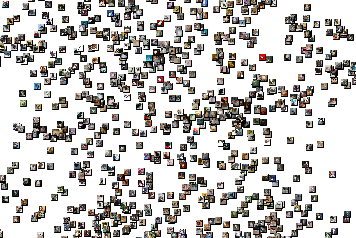

In [10]:
fig = plt.gcf()
fig.clf()
ax = plt.subplot(111)
imgs, vecs = image_names[:1000], tsne_vecs[:1000]

for img_path, xy in tqdm(zip(imgs, vecs)):
    arr_hand = resize(imread(base_path + img_path), (300, 300))
    imagebox = OffsetImage(arr_hand, zoom=.02)
    ab = AnnotationBbox(imagebox, xy, pad=0.0,
    xycoords='data',
    boxcoords="offset points")                                  
    ax.add_artist(ab)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

plt.xlim(( min(vecs[:, 0]), max(vecs[:, 0]) ))
plt.ylim(( min(vecs[:, 1]), max(vecs[:, 1]) ))

fig.savefig('./tsne', dpi=1800)